In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
hr_data=pd.read_csv('E:\Personal\DataScience\MachineLearning\HR_comma_sep.csv')

In [9]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [44]:
initial_hr_data=hr_data.copy()

In [13]:
hr_data.shape

(14999, 10)

In [14]:
#1. Checking for the null values
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [23]:
hr_data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [16]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
hr_data['average_montly_hours'].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

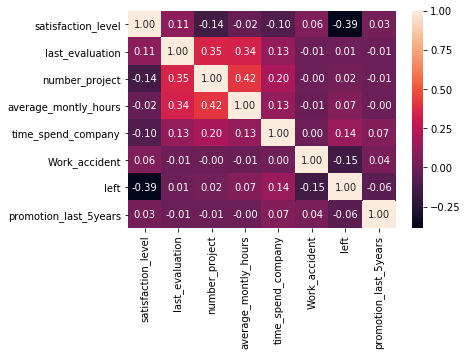

In [29]:
sns.heatmap(hr_data.corr(),annot=True,fmt='.2f')

In [31]:
hr_data.corr().nlargest(5,'left')['left']

left                    1.000000
time_spend_company      0.144822
average_montly_hours    0.071287
number_project          0.023787
last_evaluation         0.006567
Name: left, dtype: float64

In [37]:
hr_data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [43]:
hr_salary_encoder=pd.get_dummies(hr_data['salary'])
hr_salary_encoder.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [46]:
encoded_hr_data=pd.concat((hr_data,hr_salary_encoder),axis=1)

In [47]:
encoded_hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [54]:
encoded_hr_data=encoded_hr_data.drop(['salary','medium'],axis=1)

In [55]:
encoded_hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,high,low
0,0.38,0.53,2,157,3,0,1,0,sales,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,0,1


In [57]:
encoded_hr_data=encoded_hr_data.rename(columns={'sales':'Deptt'})

In [58]:
encoded_hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Deptt', 'high', 'low'],
      dtype='object')

In [59]:
encoded_hr_data['Deptt'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Deptt, dtype: int64

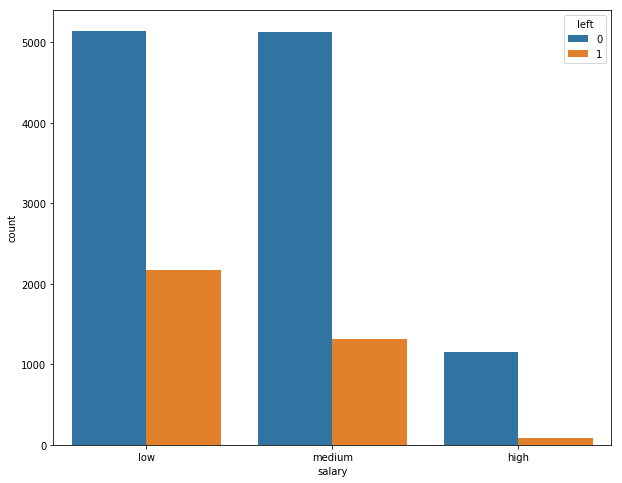

In [65]:
fig=plt.figure(figsize=(10,8))
sns.countplot(hr_data['salary'],hue=hr_data['left'])

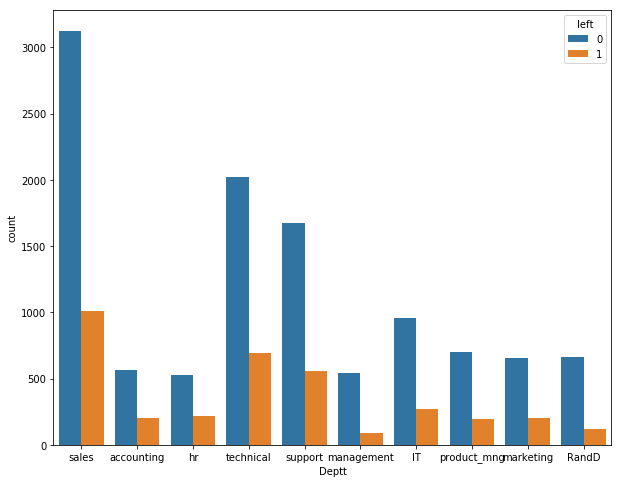

In [64]:
fig=plt.figure(figsize=(10,8))
sns.countplot(encoded_hr_data['Deptt'],hue=encoded_hr_data['left'])

In [73]:
hr_data_left=hr_data[hr_data['left']==1]

In [74]:
hr_data_left.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [123]:
hr_data_ret=hr_data[hr_data['left']==0]
hr_data_ret.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [78]:
hr_data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [89]:
final_hr_data=hr_data[['satisfaction_level','average_montly_hours','Work_accident','promotion_last_5years','salary','left']]

In [90]:
final_hr_data.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary,left
0,0.38,157,0,0,low,1
1,0.80,262,0,0,medium,1
2,0.11,272,0,0,medium,1
3,0.72,223,0,0,low,1
4,0.37,159,0,0,low,1


In [91]:
final_hr_data=pd.concat((final_hr_data,hr_salary_encoder),axis=1)

In [92]:
final_hr_data.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary,left,high,low,medium
0,0.38,157,0,0,low,1,0,1,0
1,0.80,262,0,0,medium,1,0,0,1
2,0.11,272,0,0,medium,1,0,0,1
3,0.72,223,0,0,low,1,0,1,0
4,0.37,159,0,0,low,1,0,1,0


In [93]:
final_hr_data=final_hr_data.drop(['salary','medium'],axis=1)

In [94]:
final_hr_data.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,left,high,low
0,0.38,157,0,0,1,0,1
1,0.80,262,0,0,1,0,0
2,0.11,272,0,0,1,0,0
3,0.72,223,0,0,1,0,1
4,0.37,159,0,0,1,0,1


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [101]:
y=final_hr_data[['left']]
X=final_hr_data.drop(['left'],axis=1)

In [132]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [133]:
X_train.shape

(10499, 6)

In [134]:
model_hr=LogisticRegression()

In [135]:
model_hr.fit(X_train,y_train)

C:\Users\vishal.kumar1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishal.kumar1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
model_hr.score(X_test,y_test)

0.78

In [137]:
y_pred=model_hr.predict(X_test)

In [148]:
type(y_pred)

numpy.ndarray

In [146]:
y_test.head()

,left
8166,0
2566,0
10109,0
13221,0
10239,0


In [139]:
from sklearn.metrics import confusion_matrix

In [140]:
results=confusion_matrix(y_test,y_pred)
results

array([[3259,  194],
       [ 796,  251]], dtype=int64)

In [147]:
initial_hr_data.shape

(14999, 10)

In [141]:
X_test.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,high,low
8166,0.21,235,0,0,0,1
2566,0.63,271,1,0,0,0
10109,0.95,273,0,0,0,1
13221,0.62,269,0,0,0,0
10239,0.95,210,0,0,0,0


In [142]:
final_hr_data.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,left,high,low
0,0.38,157,0,0,1,0,1
1,0.80,262,0,0,1,0,0
2,0.11,272,0,0,1,0,0
3,0.72,223,0,0,1,0,1
4,0.37,159,0,0,1,0,1


In [171]:
model_hr.predict([[0.38,157,0,0,0,1]])

array([0], dtype=int64)

In [150]:
predicted_data=pd.DataFrame(data=y_pred)

In [157]:
predicted_data=predicted_data.rename(columns={0:'Predicted'})
predicted_data.head()

,Predicted
0,1
1,0
2,0
3,0
4,0


In [158]:
checking_predicted_data=pd.concat((final_hr_data,predicted_data),axis=1)

In [173]:
checking_predicted_data[checking_predicted_data['Predicted']==checking_predicted_data['left']].head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,left,high,low,Predicted
0,0.38,157,0,0,1,0,1,1.0
8,0.89,224,0,0,1,0,1,1.0
17,0.78,255,0,0,1,0,1,1.0
21,0.38,147,0,0,1,0,1,1.0
37,0.45,126,0,0,1,0,1,1.0


In [178]:
#need to understand why this is not giving the expected result
model_hr.predict([[0.90,185,1,0,0,1]])

array([0], dtype=int64)

In [170]:
X_train.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,high,low
14313,0.42,150,0,0,0,0
3386,0.56,134,0,0,0,0
10719,0.90,185,1,0,0,0
3368,0.83,273,0,0,0,1
5522,0.78,252,0,1,1,0
